# Problemas de Estadística Descriptiva

## Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode

# Cargar dataset de IMDb
url = ('https://raw.githubusercontent.com/Davichobacter/descriptive-statistics-exercises-project-with-python/refs/heads/main/assets/imdb_1000.csv')
df = pd.read_csv(url)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [3]:
# Crea una nueva columna llamada 'title_length' con la longitud (número de caracteres) de cada título
df['title_length'] = df['title'].apply(len)
df

,star_rating,title,content_rating,genre,duration,actors_list,title_length
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",24
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",13
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",22
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",15
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",12
...,...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G...",7
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma...",27
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo...",47
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr...",11


In [32]:
# Calcula media, mediana y moda de la columna 'title_length'
df_stats = {}
df_stats['media'] = float(df['title_length'].mean(numeric_only=True))
df_stats['mediana'] = df['title_length'].median()
df_stats['moda'] = int(mode(df['title_length'])[0])
df_stats

{'media': 15.481103166496425, 'mediana': 14.0, 'moda': 12}

In [33]:
# Calcula el rango, la varianza y la desviación estándar de 'title_length'
df_stats['rango'] = df['title_length'].max() - df['title_length'].min()
df_stats['varianza'] = df['title_length'].var()
df_stats['desviacion_estandar'] = df['title_length'].std()
df_stats

{'media': 15.481103166496425,
 'mediana': 14.0,
 'moda': 12,
 'rango': 67,
 'varianza': 72.10674888402845,
 'desviacion_estandar': 8.491569282766788}

In [34]:
# Calcula asimetría y curtosis de la columna 'title_length'
df_stats = pd.DataFrame(df_stats, index=[0])
df_stats['asimetria'] = skew(df['title_length'])
df_stats['curtosis'] = kurtosis(df['title_length'])
df_stats

,media,mediana,moda,rango,varianza,desviacion_estandar,asimetria,curtosis
0,15.481103,14.0,12,67,72.106749,8.491569,1.522914,3.786724


In [35]:
# Imprime el título más corto y el título más largo según su longitud
print(df.loc[df['title_length'].idxmin(), 'title'], '-> Es el titulo más corto')
print(df.loc[df['title_length'].idxmax(), 'title'], '-> Es el titulo más largo')

M -> Es el titulo más corto
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb -> Es el titulo más largo


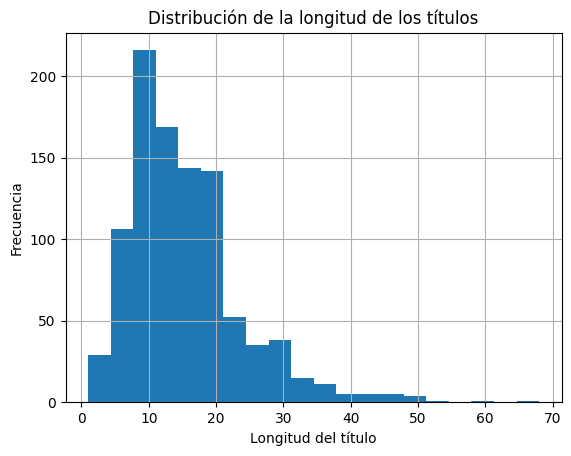

In [37]:
# grafica tus resultados
df.hist(column='title_length', bins=20)
plt.title('Distribución de la longitud de los títulos')
plt.xlabel('Longitud del título')
plt.ylabel('Frecuencia')
plt.show()

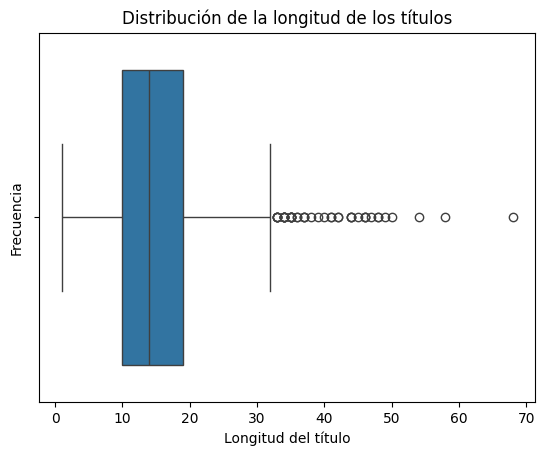

In [39]:
import seaborn as sns
sns.boxplot(x=df['title_length'])
plt.title('Distribución de la longitud de los títulos')
plt.xlabel('Longitud del título')
plt.ylabel('Frecuencia')
plt.show()

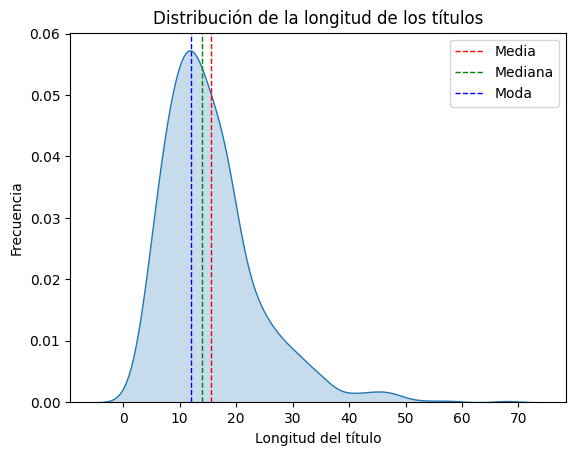

In [47]:
sns.kdeplot(df['title_length'], fill=True)
plt.title('Distribución de la longitud de los títulos')
plt.xlabel('Longitud del título')
plt.ylabel('Frecuencia')

plt.axvline(df['title_length'].mean(), color='r', linestyle='dashed', linewidth=1, label='Media')
plt.axvline(df['title_length'].median(), color='g', linestyle='dashed', linewidth=1, label='Mediana')
plt.axvline(df['title_length'].mode()[0], color='b', linestyle='dashed', linewidth=1, label='Moda')

plt.legend()

plt.show()

---

## Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


In [ ]:
# Crea una lista con 5 valores reales de df['title_length'], por ejemplo: [10, 13, 14, 18, 22]

In [ ]:
# Calcula la media de los 5 valores

In [ ]:
# Calcula las diferencias al cuadrado con respecto a la media

In [ ]:
# Calcula la varianza (promedio de las diferencias al cuadrado) y su raíz cuadrada para obtener la desviación

In [48]:
# Varianza, si es poblacional el tipo es 0 y si es muestral, 1
def varianza(lista, tipo=0):
  if tipo == 0:
    return sum([(x - np.mean(lista))**2 for x in lista]) / len(lista)
  elif tipo == 1:
    return sum([(x - np.mean(lista))**2 for x in lista]) / (len(lista) - 1)

In [49]:
# Varianza poblacional sobre el DataSet
varianza(df['title_length'], tipo=0)

np.float64(72.03309541223679)

In [50]:
# Varianza muestral sobre el DataSet
varianza(df['title_length'], tipo=1)

np.float64(72.10674888402845)

In [51]:
def dispersion(lista, method='standard', population=True):
  if method == 'standard':
    if population:
      return (sum([(x - np.mean(lista))**2 for x in lista]) / len(lista))**0.5
    elif not population:
      return (sum([(x - np.mean(lista))**2 for x in lista]) / (len(lista) - 1))**0.5
  elif method == 'variance':
    if population:
      return sum([(x - np.mean(lista))**2 for x in lista]) / len(lista)
    elif not population:
      return sum([(x - np.mean(lista))**2 for x in lista]) / (len(lista) - 1)

In [54]:
from numpy import random
random.seed(123)

varianza_poblacional = dispersion(random.normal(size=1000, loc=0.0, scale=1.0), method='variance', population=True)
varianza_muestral = dispersion(random.normal(size=1000, loc=0.0, scale=1.0), method='variance', population=False)

print('La varianza poblacional es de ', varianza_poblacional)
print('La varianza muestral es de ', varianza_muestral)

La varianza poblacional es de  1.0015756952478072
La varianza muestral es de  0.9187010087525564


In [56]:
d_standard_poblacional = dispersion(random.normal(size=1000, loc=0.0, scale=1.0), method='standard', population=True)
d_standard_muestral = dispersion(random.normal(size=1000, loc=0.0, scale=1.0), method='standard', population=False)

print('La desviación estándar poblacional es de ', d_standard_poblacional)
print('La desviación estándar muestral es de ', d_standard_muestral)

La desviación estándar poblacional es de  0.9814583721513673
La desviación estándar muestral es de  0.9895395833448501
